# Question 4
Question statement: 

Using the famous pima Indians diabetes dataset, use the neural network classifier from scikit-learn on this dataset. What is the effect of varying the size, number of epochs and number of hidden layers on classification performance? Use the resources below. Note that you may need to upgrade your version of sklearn in order to be able to use this classifier (e.g. conda update scikit-learn)

references: 
http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html 
http://scikit-learn.org/stable/modules/neural_networks_supervised.html 



# Parsing the data
We use Pandas to read the csv file into a dataframe. 

Exercise: 
 1. Explore the dataset by just looking at the dataframe. 
 2. How many features? Types of features? Continuous, categorical, ordinal?
 3. What is the class label? 

In [7]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn import neural_network
import matplotlib.pyplot as plt
import itertools
import numpy as np
import seaborn as sns
%matplotlib inline


from sklearn.decomposition import PCA
import plotly.express as px


In [8]:
df_pima = pd.read_csv("./pima-indians-diabetes.csv", sep=',')

# features and class names
feature_names = list(df_pima.columns[:-1])
outcome_variable = "has_diabetes"

# Parse data in to X (features) and y (labels) arrays. 
X = np.array(df_pima[feature_names])
y = np.array(df_pima[outcome_variable])
X.shape, y.shape

((768, 8), (768,))

In [3]:
df_pima

,numpregnant,plasma,blood pressure,sf-thickness,serum-insulin,BMI,pedigree-function,age,has_diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


--- 
## Some data exploration
---
Using Python plotting libraries to visualise the data. 
Questions: 
 1. Are there any single features that perfectly predict whether or not a patient has diabetes? Look at the density estimation (histogram) on the diagonal colored by `has_diabetes`. Answer: No
 2. Are there any combination of two variable that prefectly predict `has_diabetes`? Look at other scatter plots to see whether the colored points cleanly separate. 

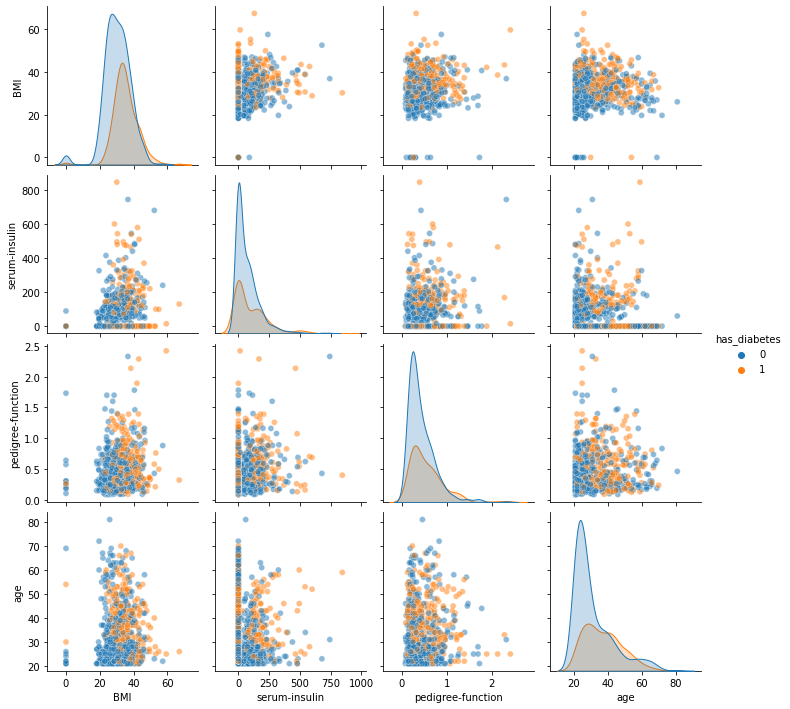

In [9]:
sns.pairplot(
    data=df_pima, 
    hue=outcome_variable, 
    vars=["BMI", "serum-insulin", "pedigree-function", "age"], 
    plot_kws={"alpha": 0.5}
)

## Visualising  first 3 principal components
It seems like even with the first 3-principal components, the `has_diabetes` values is still not cleanly separated, with linear separation or otherwise. 
This is going to be a challenging dataset to classify.

In [10]:
pca = PCA()
X_transformed = pca.fit_transform(X)

fig = px.scatter_3d(
    X_transformed, x=0, y=1, z=2, color=y,
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}, 
    size=np.ones(y.shape) * 0.1, 
    size_max=10
)
fig.show()

---
# Training a neural network model for the PIMA dataset
----
Exercise: 
 1. Read and understand [sklearn documentation for MLP](# Read https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) for parameters definition. Relate the parameters to what you learn in class. 
 2. Define network models with different combination of parameters and see how they affect the result. 


In [13]:

ann=neural_network.MLPClassifier(hidden_layer_sizes=(10,6,5),
                                 activation='relu', solver='sgd',
                                 batch_size= 64, 
                                 alpha=0.0001, 
                                 learning_rate='adaptive', 
                                 max_iter=200,  
                                 random_state=3)

#Activation
  # ‘logistic’, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).
  #‘tanh’, the hyperbolic tan function, returns f(x) = tanh(x).
  #‘relu’, the rectified linear unit function, returns f(x) = max(0, x)
    
#max_iter : Maximum number of epochs. how many times each data point will be used.

print("10-fold cross validation accuracy= ",cross_val_score(ann, X, y,cv=10).mean())

10-fold cross validation accuracy=  0.6510594668489406


### Varying the batch size

/home/edmund/.local/share/virtualenvs/BUSA90501_ML_2021-lDt4A8C-/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/home/edmund/.local/share/virtualenvs/BUSA90501_ML_2021-lDt4A8C-/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/home/edmund/.local/share/virtualenvs/BUSA90501_ML_2021-lDt4A8C-/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/home/edmund/.local/share/virtualenvs/BUSA90501_ML_2021-lDt4A8C-/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning:

Stochastic Optimizer: Maximum i

/home/edmund/.local/share/virtualenvs/BUSA90501_ML_2021-lDt4A8C-/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/home/edmund/.local/share/virtualenvs/BUSA90501_ML_2021-lDt4A8C-/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/home/edmund/.local/share/virtualenvs/BUSA90501_ML_2021-lDt4A8C-/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/home/edmund/.local/share/virtualenvs/BUSA90501_ML_2021-lDt4A8C-/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning:

Stochastic Optimizer: Maximum i

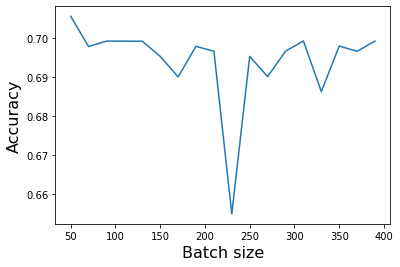

In [15]:

batch_size = range(50,400,20)

accuracies=[]
for bs in batch_size:
    ann=neural_network.MLPClassifier(hidden_layer_sizes=(10, 50),
                                 activation='relu', solver='sgd', batch_size= bs, 
                                 alpha=0.0001, learning_rate='adaptive', max_iter=800,  random_state=3)
    
    cv_score = cross_val_score(ann, X, y,cv=10).mean()
    accuracies.append(cv_score)

plt.plot(batch_size,accuracies)
plt.xlabel('Batch size', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.show()

### Varying the size of hidden layers

[(10, 10), (10, 100), (100, 10), (100, 100)]
Hidden layer size: (10, 10)
CPU times: user 4.31 s, sys: 0 ns, total: 4.31 s
Wall time: 4.31 s
0.6979494190020505
Hidden layer size: (10, 100)
CPU times: user 3.01 s, sys: 0 ns, total: 3.01 s
Wall time: 3.01 s
0.6862781954887218
Hidden layer size: (100, 10)
CPU times: user 2.92 s, sys: 0 ns, total: 2.92 s
Wall time: 2.92 s
0.7147983595352017
Hidden layer size: (100, 100)
CPU times: user 19.5 s, sys: 56.6 s, total: 1min 16s
Wall time: 6.74 s
0.6784518113465482


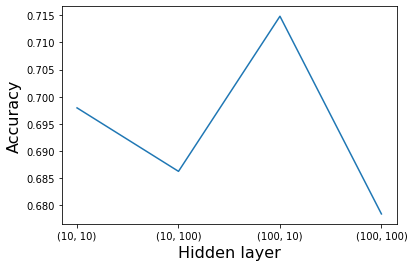

In [16]:

h_size = [x for x in itertools.product((10,100),repeat=2)]
print(h_size)

accuracies=[]


for hs in h_size:
    print(f"Hidden layer size: {hs}")
    ann=neural_network.MLPClassifier(hidden_layer_sizes=hs,
                                     activation='relu', 
                                     solver='adam',
                                     batch_size= 64, 
                                     alpha=0.0001,
                                     learning_rate='adaptive', 
                                     max_iter=500,  
                                     random_state=40)

    %time cv_score = cross_val_score(ann, X, y,cv=10 ).mean()
    accuracies.append(cv_score)
    print(cv_score)
    
hidden_layer = [str(i) for i in h_size]

plt.plot(range(0,len(hidden_layer)),accuracies)
plt.xlabel('Hidden layer', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.xticks(range(0,len(hidden_layer)),hidden_layer)
plt.show()

### Varying the number of hidden layers


CPU times: user 4.39 s, sys: 21.3 ms, total: 4.41 s
Wall time: 4.39 s
Hidden layers size: (10, 10)
Score: 0.6979494190020505
CPU times: user 3.19 s, sys: 0 ns, total: 3.19 s
Wall time: 3.19 s
Hidden layers size: (10, 100)
Score: 0.6862781954887218
CPU times: user 2.85 s, sys: 0 ns, total: 2.85 s
Wall time: 2.85 s
Hidden layers size: (100, 10)
Score: 0.7147983595352017
CPU times: user 18 s, sys: 48.1 s, total: 1min 6s
Wall time: 5.73 s
Hidden layers size: (100, 100)
Score: 0.6784518113465482
CPU times: user 4.32 s, sys: 846 ms, total: 5.17 s
Wall time: 4.08 s
Hidden layers size: (10, 100, 10)
Score: 0.6548530416951469
CPU times: user 22.4 s, sys: 1min 6s, total: 1min 29s
Wall time: 7.95 s
Hidden layers size: (10, 100, 50)
Score: 0.6457792207792208
CPU times: user 19.2 s, sys: 48.7 s, total: 1min 7s
Wall time: 6.14 s
Hidden layers size: (10, 100, 100)
Score: 0.6691045796308954
CPU times: user 6.26 s, sys: 794 ms, total: 7.05 s
Wall time: 6.06 s
Hidden layers size: (10, 10, 50)
Score: 0.7

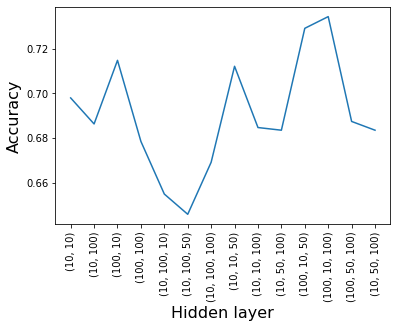

In [17]:
h_layer = list(itertools.product((10,100),repeat=2)) + list(itertools.combinations([10,100,10,50,100], 3))

accuracies=[]


for hs in h_layer:
    ann=neural_network.MLPClassifier(hidden_layer_sizes=hs,
                                     activation='relu', 
                                     solver='adam',
                                     batch_size= 64,
                                     alpha=0.0001,
                                     learning_rate='adaptive',
                                     max_iter=500,
                                     random_state=40)

    %time cv_score = cross_val_score(ann, X, y, cv=10).mean()
    accuracies.append(cv_score)
    print(f"Hidden layers size: {hs}\nScore: {cv_score}")
    

hidden_layer = [str(i) for i in h_layer]

plt.plot(range(0,len(hidden_layer)),accuracies)
plt.xlabel('Hidden layer', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.xticks(range(0,len(h_layer)),hidden_layer, rotation=90)
plt.show()

In [18]:
ann=neural_network.MLPClassifier(hidden_layer_sizes=(10, 50, 10, 10),
                                 activation='relu', 
                                 solver='adam',
                                 batch_size= 64,
                                 alpha=0.001,
                                 learning_rate='adaptive',
                                 max_iter=500,
                                 random_state=40)

%time cv_score = cross_val_score(ann, X, y, cv=10).mean()
cv_score

CPU times: user 6.19 s, sys: 11.7 ms, total: 6.2 s
Wall time: 6.18 s


0.7292207792207792